In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

In [3]:
# Crear una copia del dataset original
dataset_copy_RL = dataset.copy()

In [4]:
# Seleccionar las columnas a usar
columns_to_use_RL = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']

In [5]:
# Separar las variables dependientes e independientes
X = dataset_copy_RL[columns_to_use_RL]  # Variables predictoras
y = dataset_copy_RL['HGB']  # Variable objetivo (cambia si es otra la que quieres predecir)

In [6]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Crear el modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

In [8]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],     # Tasa de aprendizaje
    'max_depth': [3, 5, 7],                # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # Mínimo de muestras en una hoja
    'subsample': [0.8, 1.0],               # Submuestreo de datos
}

In [9]:
# Aplicar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [10]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [11]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados por GridSearchCV:")
print(best_params)

Mejores parámetros encontrados por GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}


In [12]:
# Usar el mejor modelo encontrado
best_gbr = grid_search.best_estimator_

In [13]:
# Hacer predicciones en los datos de prueba
y_pred = best_gbr.predict(X_test)

In [14]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'R² score: {r2}')

Error cuadrático medio (MSE): 0.000815183153292985
R² score: 0.9998232185059053


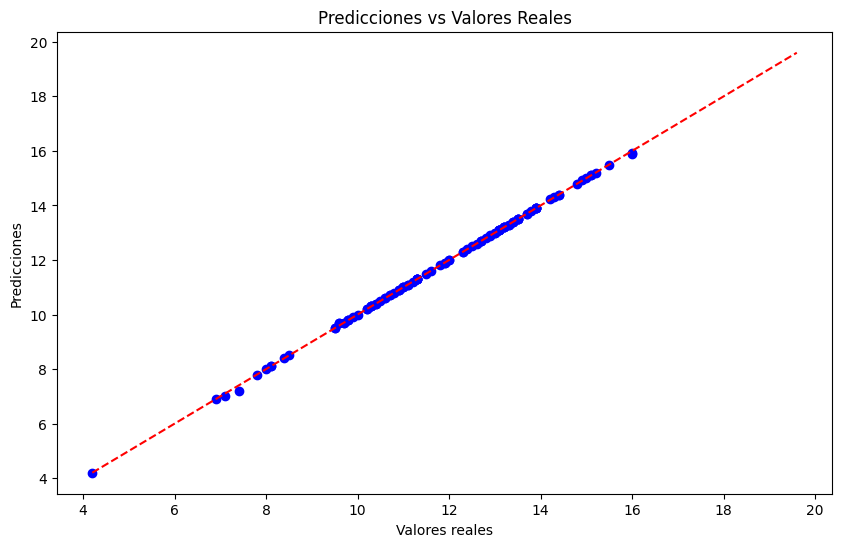

In [15]:
# Graficar los resultados: Predicciones vs Reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

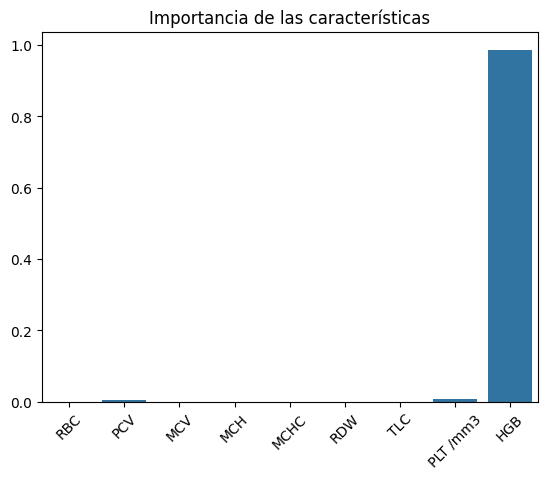

In [16]:
# Graficar la importancia de las características
feature_importances = best_gbr.feature_importances_
sns.barplot(x=columns_to_use_RL, y=feature_importances)
plt.title('Importancia de las características')
plt.xticks(rotation=45)
plt.show()